In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
%matplotlib inline


In [3]:
full_travel_data = pd.read_csv("C:/Users/Babayeju/Desktop/Github/Holiday_EDA/fulltraveldata.csv")
full_travel_data['this_period'] = pd.to_datetime(full_travel_data['this_period'].astype(str), format='%Y%m')
full_travel_data['this_period'] = full_travel_data['this_period'].dt.to_period('M')


In [4]:
full_travel_data.head()

,rundate,this_period,foreign_region,foreign_country,UK_airport,foreign_airport,ty_total,ty_sch,ty_char,ly_total,ly_sch,ly_char,pc_change
0,17/03/2022 11:53,2022-01,WESTERN EUROPE-EU,AUSTRIA,GATWICK,INNSBRUCK,13481,9240,4241,96,96,0,13942.708330
1,17/03/2022 11:53,2022-01,WESTERN EUROPE-EU,AUSTRIA,GATWICK,SALZBURG,3683,1483,2200,65,65,0,5566.153846
2,17/03/2022 11:53,2022-01,WESTERN EUROPE-EU,AUSTRIA,GATWICK,VIENNA,0,0,0,106,106,0,-100.000000
3,17/03/2022 11:53,2022-01,WESTERN EUROPE-EU,AUSTRIA,HEATHROW,INNSBRUCK,7702,7702,0,0,0,0,0.000000
4,17/03/2022 11:53,2022-01,WESTERN EUROPE-EU,AUSTRIA,HEATHROW,SALZBURG,6270,6270,0,0,0,0,0.000000


In [5]:
# 1. Monthly Trends

# 1.1 Total Travelers by Month
monthly_travelers = full_travel_data.groupby(full_travel_data['this_period'].dt.to_timestamp())['ty_total'].sum().reset_index()
monthly_travelers['this_period'] = monthly_travelers['this_period'].dt.to_period('M')

# 1.2 Scheduled vs. Chartered Travelers by Month (Corrected Columns)
monthly_scheduled_chartered = full_travel_data.groupby(full_travel_data['this_period'].dt.to_timestamp())[['ty_sch', 'ty_char']].sum().reset_index()
monthly_scheduled_chartered['this_period'] = monthly_scheduled_chartered['this_period'].dt.to_period('M')

# Displaying the results
monthly_travelers, monthly_scheduled_chartered


(   this_period  ty_total
 0      2022-01   5844024
 1      2022-02   8300762
 2      2022-03  11589110
 3      2022-04  15996614
 4      2022-05  17984754
 5      2022-06  20324448
 6      2022-07  21844652
 7      2022-08  22260947
 8      2022-09  20515126
 9      2022-10  19417344
 10     2022-11  14219815
 11     2022-12  15378300,
    this_period    ty_sch  ty_char
 0      2022-01   5547501   296523
 1      2022-02   7917208   383554
 2      2022-03  11122938   466172
 3      2022-04  15441472   555142
 4      2022-05  16904154  1080600
 5      2022-06  18957001  1367447
 6      2022-07  20366088  1478564
 7      2022-08  20689491  1571456
 8      2022-09  19111066  1404060
 9      2022-10  18505048   912296
 10     2022-11  13833807   386008
 11     2022-12  14855534   522766)

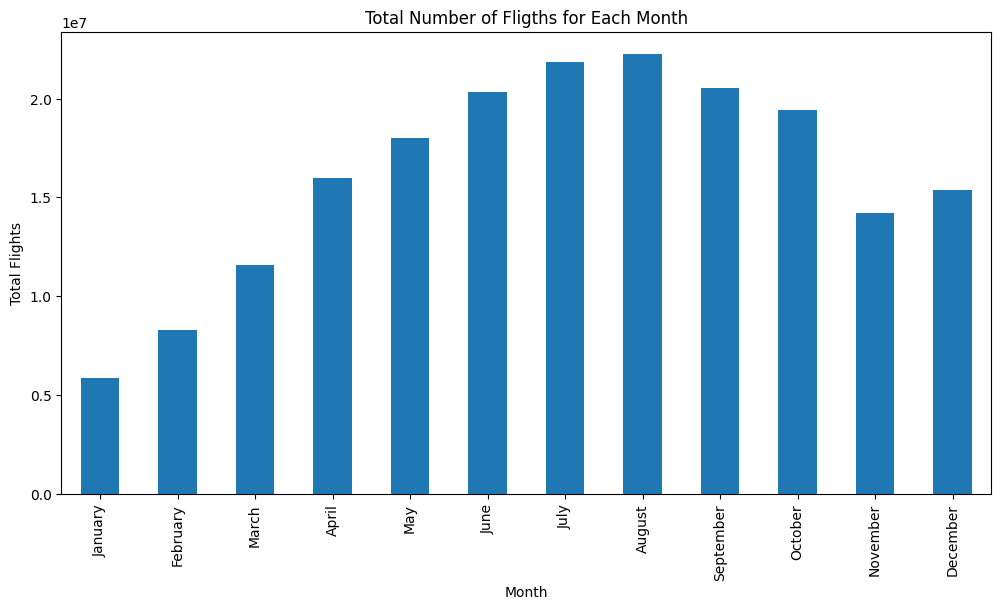

In [6]:
# Convert 'this_period' to datetime
fc_total_top13 = monthly_travelers.sort_values(by='this_period', ascending=True).head(13)
fc_total_top13['this_period'] = fc_total_top13['this_period'].dt.to_timestamp()

# Extract the month names
fc_total_top13['month'] = fc_total_top13['this_period'].dt.strftime('%B')

# Set 'month' as the index
fc_total_top13.set_index('month', inplace=True)

# Plot the data using pandas built-in functionality
fc_total_top13['ty_total'].plot(kind='bar', figsize=(12, 6))

# Give the plot a title and label the axes
plt.title('Total Number of Fligths for Each Month')
plt.xlabel('Month')
plt.ylabel('Total Flights')

# Show the plot
plt.show()


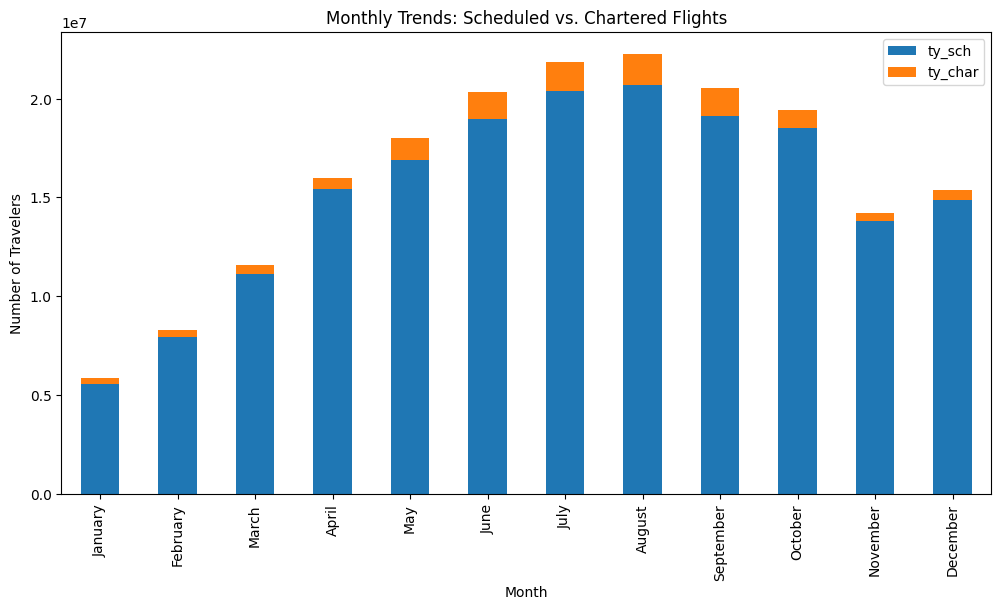

In [7]:
# Convert 'this_period' to datetime and set it as the index
monthly_scheduled_chartered['this_period'] = monthly_scheduled_chartered['this_period'].dt.to_timestamp()
monthly_scheduled_chartered.set_index('this_period', inplace=True)

# Plot the data using pandas built-in functionality with stacked bars
ax = monthly_scheduled_chartered[['ty_sch', 'ty_char']].plot(kind='bar', stacked=True, figsize=(12, 6))

# Give the plot a title and label the axes
plt.title('Monthly Trends: Scheduled vs. Chartered Flights')
plt.xlabel('Month')
plt.ylabel('Number of Travelers')

# Display the x-axis labels with month names
ax.set_xticklabels(monthly_scheduled_chartered.index.strftime('%B'))

# Show the plot
plt.show()


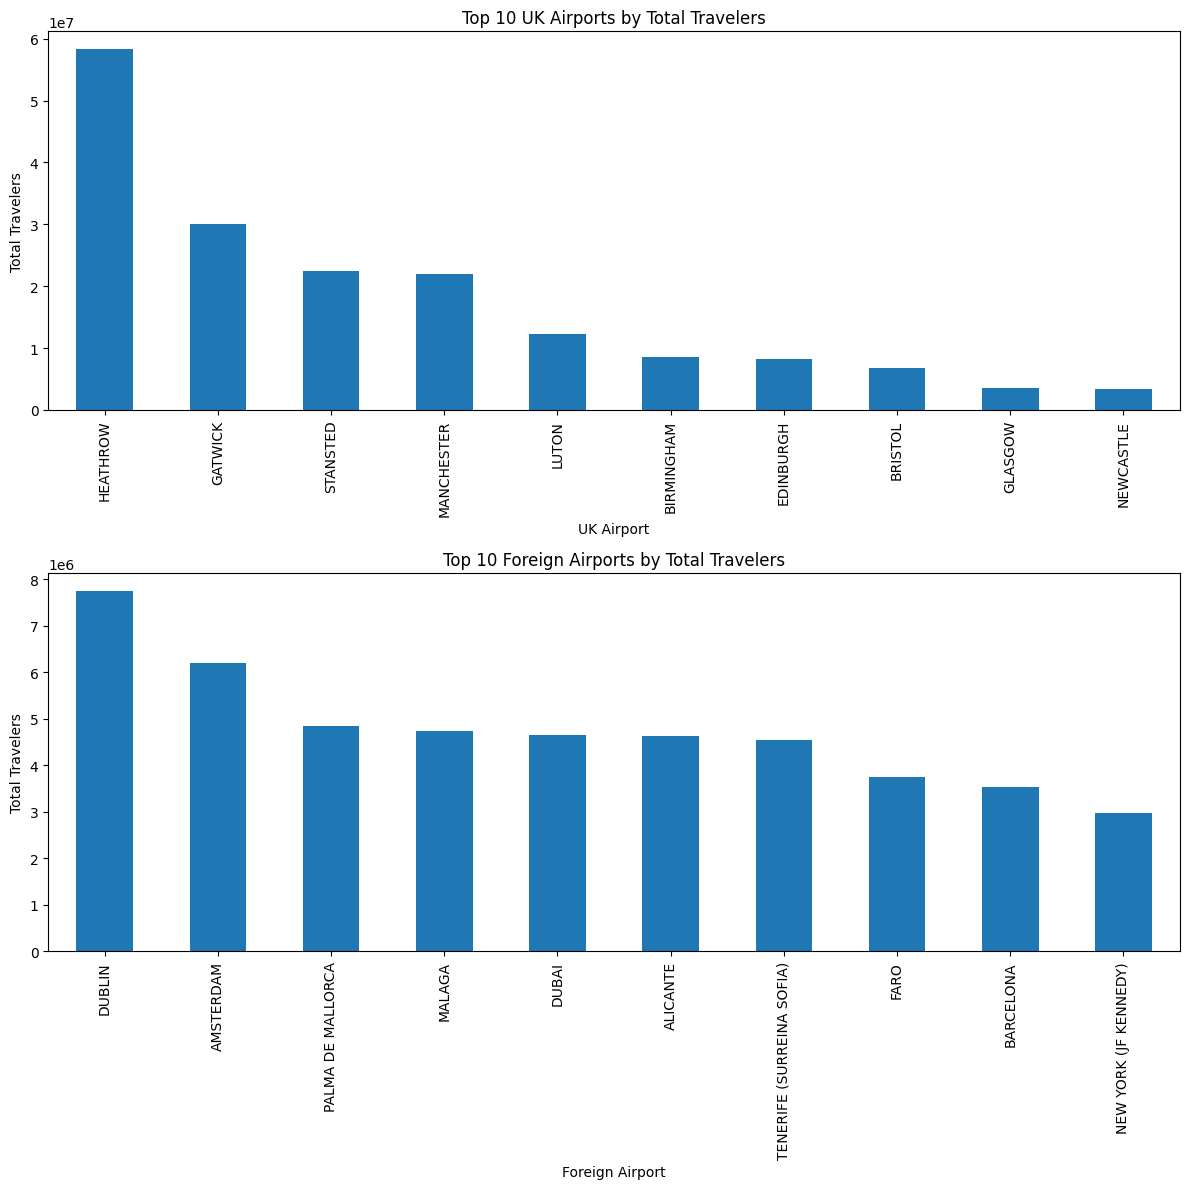

In [8]:
# Most Popular UK Airports
top_uk_airports = full_travel_data.groupby('UK_airport')['ty_total'].sum().nlargest(10).reset_index()

# Most Popular Foreign Airports
top_foreign_airports = full_travel_data.groupby('foreign_airport')['ty_total'].sum().nlargest(10).reset_index()

# Creating bar plots for the top UK and foreign airports
fig, ax = plt.subplots(2, 1, figsize=(12, 12))

# Top UK airports
top_uk_airports.plot(kind='bar', x='UK_airport', y='ty_total', ax=ax[0], legend=False)
ax[0].set_title('Top 10 UK Airports by Total Travelers')
ax[0].set_xlabel('UK Airport')
ax[0].set_ylabel('Total Travelers')

# Top foreign airports
top_foreign_airports.plot(kind='bar', x='foreign_airport', y='ty_total', ax=ax[1], legend=False)
ax[1].set_title('Top 10 Foreign Airports by Total Travelers')
ax[1].set_xlabel('Foreign Airport')
ax[1].set_ylabel('Total Travelers')

plt.tight_layout()
plt.show()

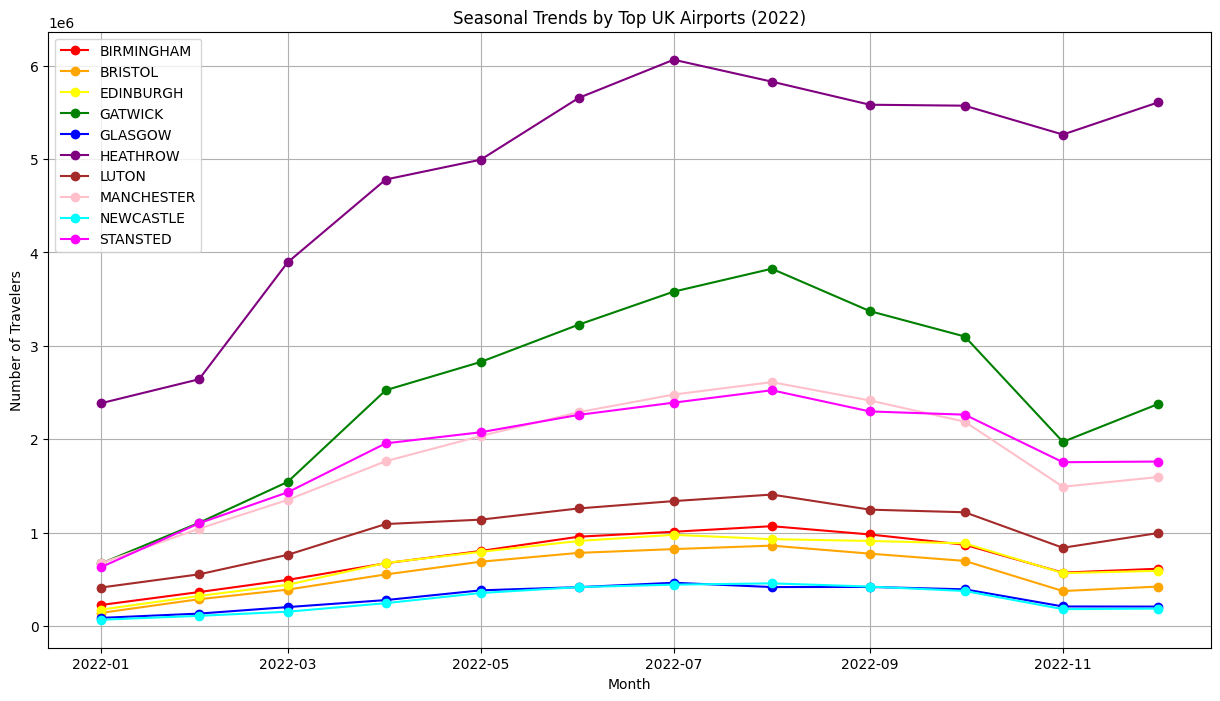

IndexError: list index out of range

<Figure size 1500x800 with 0 Axes>

In [11]:
# Loading the dataset and preprocessing
full_travel_data_updated = pd.read_csv("C:/Users/Babayeju/Desktop/Github/Holiday_EDA/fulltraveldata.csv")
full_travel_data_updated['this_period'] = pd.to_datetime(full_travel_data_updated['this_period'], format='%Y%m')

# Grouping by UK airports and month for seasonal trend
uk_airports_seasonal_trends = full_travel_data_updated.groupby(['this_period', 'UK_airport'])['ty_total'].sum().reset_index()

# Filtering for top UK airports
top_uk_airports = full_travel_data_updated.groupby('UK_airport')['ty_total'].sum().nlargest(10).reset_index()
uk_airports_seasonal_trends = uk_airports_seasonal_trends[uk_airports_seasonal_trends['UK_airport'].isin(top_uk_airports['UK_airport'])]

# Grouping by foreign airports and month for seasonal trend
foreign_airports_seasonal_trends = full_travel_data_updated.groupby(['this_period', 'foreign_airport'])['ty_total'].sum().reset_index()

# Filtering for top foreign airports
top_foreign_airports = full_travel_data_updated.groupby('foreign_airport')['ty_total'].sum().nlargest(10).reset_index()
foreign_airports_seasonal_trends = foreign_airports_seasonal_trends[foreign_airports_seasonal_trends['foreign_airport'].isin(top_foreign_airports['foreign_airport'])]

# Convert PeriodIndex to DateTimeIndex for UK Airports
uk_airports_seasonal_trends_pivot = uk_airports_seasonal_trends.pivot(index='this_period', columns='UK_airport', values='ty_total')

# Convert PeriodIndex to DateTimeIndex for Foreign Airports
foreign_airports_seasonal_trends_pivot = foreign_airports_seasonal_trends.pivot(index='this_period', columns='foreign_airport', values='ty_total')

# Plotting with different colors

# Given that there are several lines to be plotted, we'll use a colormap to ensure each line gets a distinct color.
colors = plt.cm.viridis(np.linspace(0, 1, len(uk_airports_seasonal_trends_pivot.columns) + len(foreign_airports_seasonal_trends_pivot.columns)))


# Defining a more distinct set of colors
distinct_colors = ['red', 'orange', 'yellow', 'green', 'blue', 'purple', 'brown', 'pink', 'cyan', 'magenta']

# Plotting the Seasonal Trends for UK Airports with distinct colors
plt.figure(figsize=(15, 8))
for idx, column in enumerate(uk_airports_seasonal_trends_pivot.columns):
    plt.plot(uk_airports_seasonal_trends_pivot.index, uk_airports_seasonal_trends_pivot[column], marker='o', label=column, color=distinct_colors[idx])

plt.xlabel('Month')
plt.ylabel('Number of Travelers')
plt.title('Seasonal Trends by Top UK Airports (2022)')
plt.legend()
plt.grid(True)
plt.show()

# Plotting the Seasonal Trends for Foreign Airports with distinct colors
plt.figure(figsize=(15, 8))
for idx, column in enumerate(foreign_airports_seasonal_trends_pivot.columns):
    plt.plot(foreign_airports_seasonal_trends_pivot.index, foreign_airports_seasonal_trends_pivot[column], marker='o', label=column, color=distinct_colors[idx + len(uk_airports_seasonal_trends_pivot.columns)])

plt.xlabel('Month')
plt.ylabel('Number of Travelers')
plt.title('Seasonal Trends by Top Foreign Airports (2022)')
plt.legend()
plt.grid(True)
plt.show()


# Plotting the Seasonal Trends for UK Airports with different colors
plt.figure(figsize=(15, 8))
for idx, column in enumerate(uk_airports_seasonal_trends_pivot.columns):
    plt.plot(uk_airports_seasonal_trends_pivot.index, uk_airports_seasonal_trends_pivot[column], marker='o', label=column, color=colors[idx])

plt.xlabel('Month')
plt.ylabel('Number of Travelers')
plt.title('Seasonal Trends by Top UK Airports (2022)')
plt.legend()
plt.grid(True)
plt.show()

# Plotting the Seasonal Trends for Foreign Airports with different colors
plt.figure(figsize=(15, 8))
for idx, column in enumerate(foreign_airports_seasonal_trends_pivot.columns):
    plt.plot(foreign_airports_seasonal_trends_pivot.index, foreign_airports_seasonal_trends_pivot[column], marker='o', label=column, color=colors[idx + len(uk_airports_seasonal_trends_pivot.columns)])

plt.xlabel('Month')
plt.ylabel('Number of Travelers')
plt.title('Seasonal Trends by Top Foreign Airports (2022)')
plt.legend()
plt.grid(True)
plt.show()



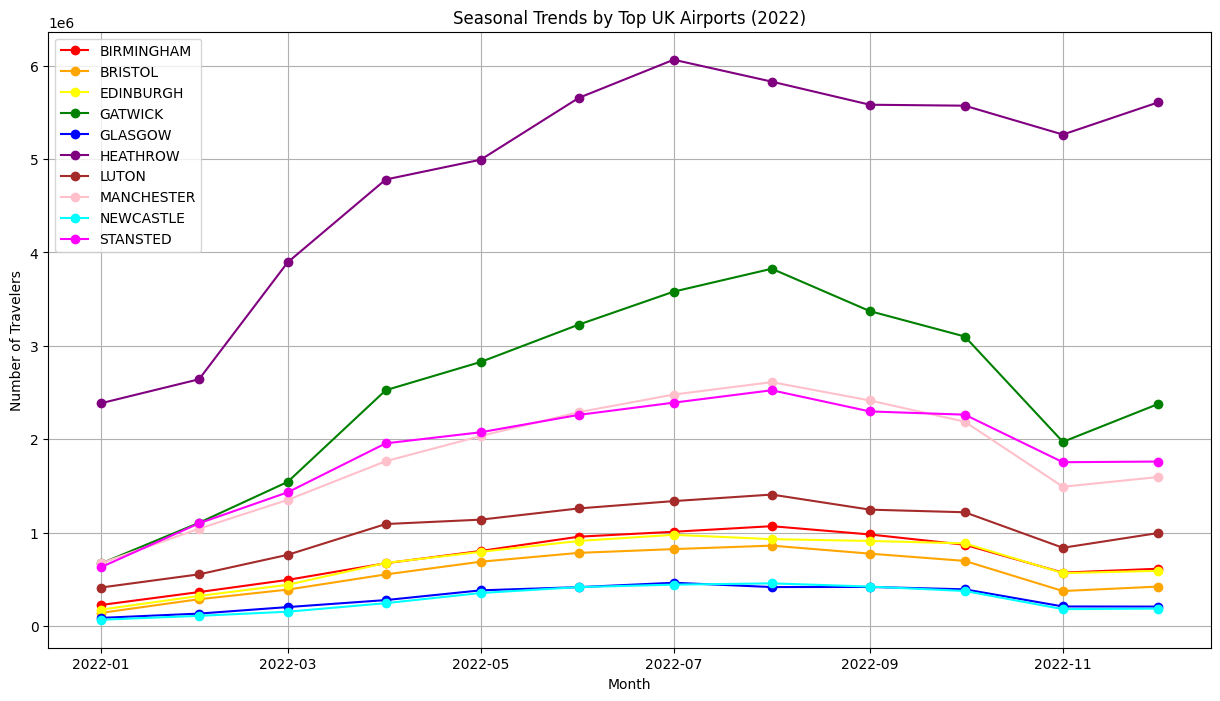

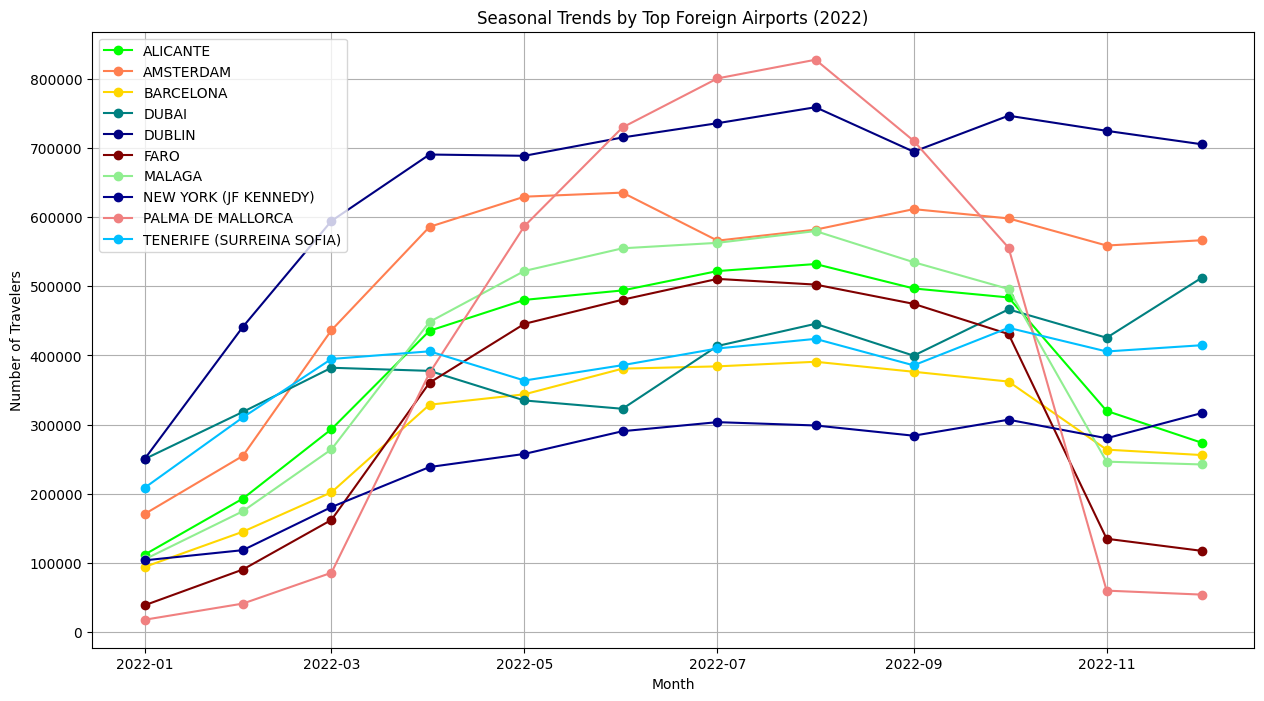

In [12]:
# Adjusting the distinct colors list to ensure we have enough colors for all lines on both plots
distinct_colors = ['red', 'orange', 'yellow', 'green', 'blue', 'purple', 'brown', 'pink', 'cyan', 'magenta', 
                   'lime', 'coral', 'gold', 'teal', 'navy', 'maroon', 'lightgreen', 'darkblue', 'lightcoral', 'deepskyblue']

# Plotting the Seasonal Trends for UK Airports with distinct colors
plt.figure(figsize=(15, 8))
for idx, column in enumerate(uk_airports_seasonal_trends_pivot.columns):
    plt.plot(uk_airports_seasonal_trends_pivot.index, uk_airports_seasonal_trends_pivot[column], marker='o', label=column, color=distinct_colors[idx])

plt.xlabel('Month')
plt.ylabel('Number of Travelers')
plt.title('Seasonal Trends by Top UK Airports (2022)')
plt.legend()
plt.grid(True)
plt.show()

# Plotting the Seasonal Trends for Foreign Airports with distinct colors
plt.figure(figsize=(15, 8))
for idx, column in enumerate(foreign_airports_seasonal_trends_pivot.columns):
    plt.plot(foreign_airports_seasonal_trends_pivot.index, foreign_airports_seasonal_trends_pivot[column], marker='o', label=column, color=distinct_colors[idx + len(uk_airports_seasonal_trends_pivot.columns)])

plt.xlabel('Month')
plt.ylabel('Number of Travelers')
plt.title('Seasonal Trends by Top Foreign Airports (2022)')
plt.legend()
plt.grid(True)
plt.show()


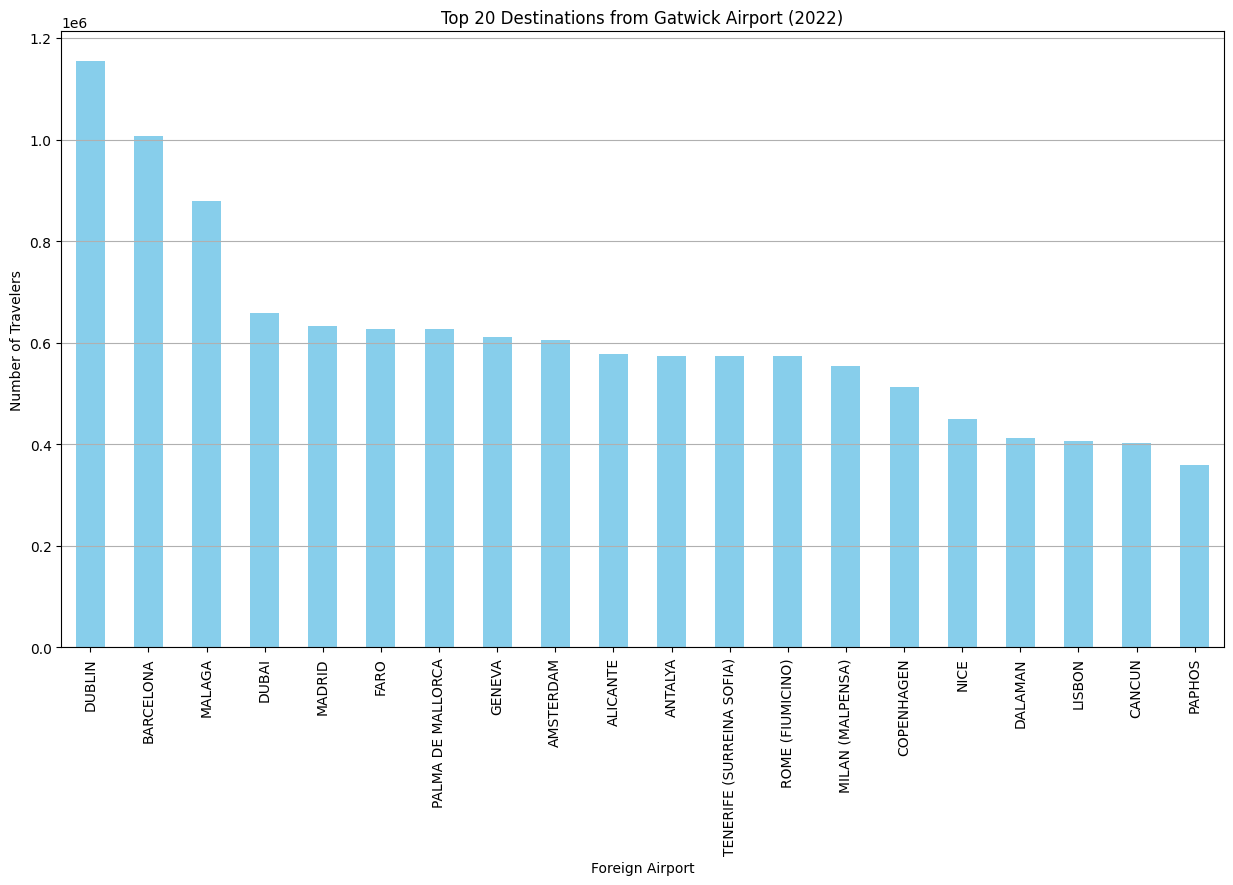

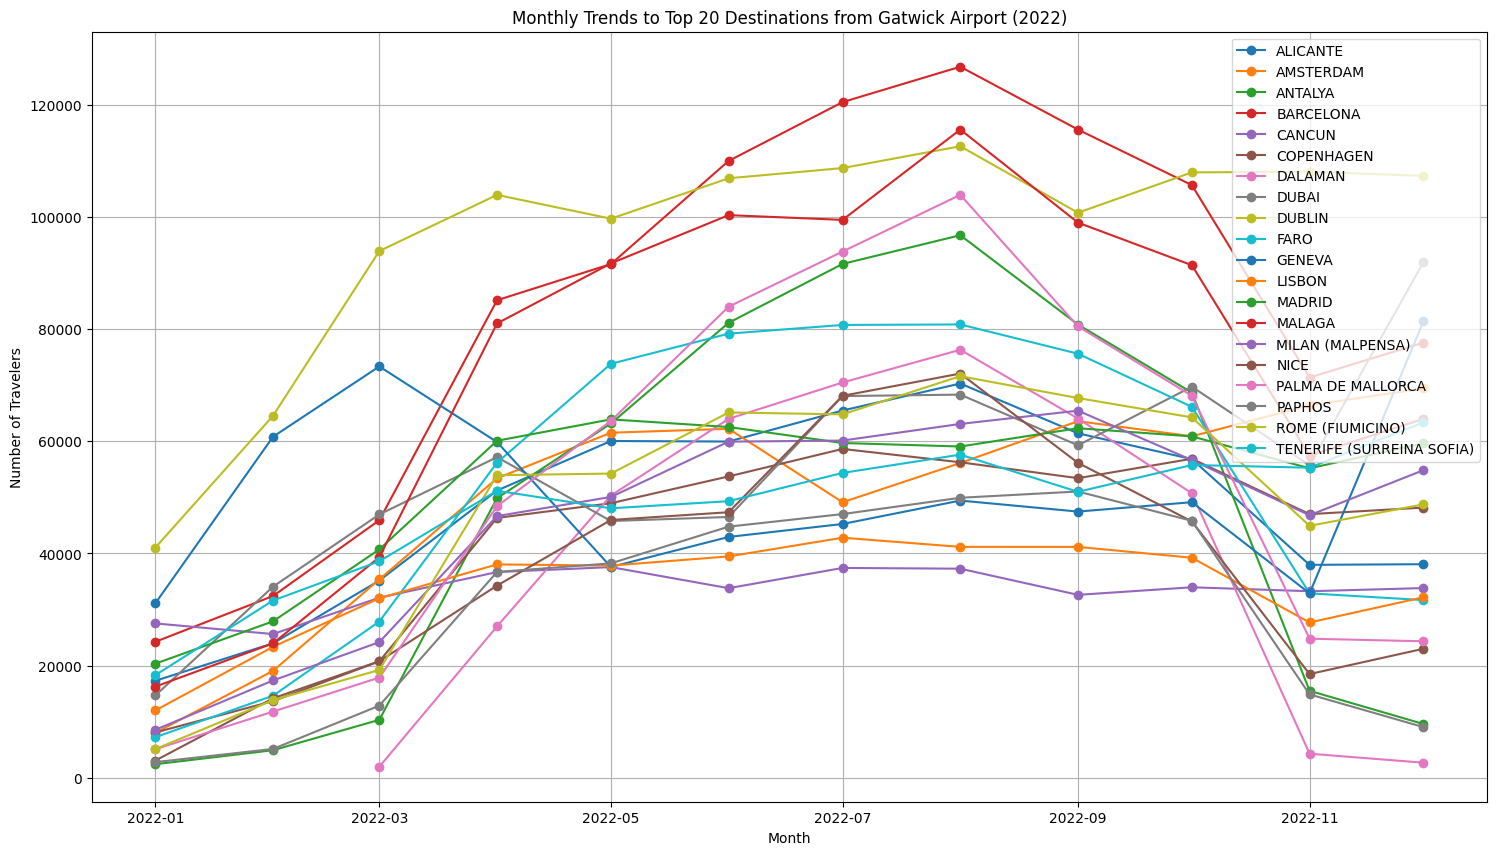

In [14]:

# Filtering the data for Gatwick Airport
gatwick_data = full_travel_data_updated[full_travel_data_updated['UK_airport'] == 'GATWICK']

# Grouping by foreign airport and summing up the 'ty_total' for each foreign airport
gatwick_top_destinations = gatwick_data.groupby('foreign_airport')['ty_total'].sum().nlargest(20)

# Plotting the trend for the top 20 foreign airports traveled to from Gatwick
plt.figure(figsize=(15, 8))
gatwick_top_destinations.plot(kind='bar', color='skyblue')
plt.title('Top 20 Destinations from Gatwick Airport (2022)')
plt.xlabel('Foreign Airport')
plt.ylabel('Number of Travelers')
plt.grid(axis='y')
plt.show()

# Grouping data by foreign airport and month to get monthly totals for each foreign airport
gatwick_monthly_data = gatwick_data.groupby(['foreign_airport', 'this_period'])['ty_total'].sum().reset_index()

# Filtering for the top 20 foreign airports
gatwick_monthly_top_destinations = gatwick_monthly_data[gatwick_monthly_data['foreign_airport'].isin(gatwick_top_destinations.index)]

# Pivot the data for plotting
gatwick_monthly_pivot = gatwick_monthly_top_destinations.pivot(index='this_period', columns='foreign_airport', values='ty_total')

# Plotting the trendlines for top 20 foreign airports traveled to from Gatwick
plt.figure(figsize=(18, 10))
for column in gatwick_monthly_pivot.columns:
    plt.plot(gatwick_monthly_pivot.index, gatwick_monthly_pivot[column], marker='o', label=column)

plt.title('Monthly Trends to Top 20 Destinations from Gatwick Airport (2022)')
plt.xlabel('Month')
plt.ylabel('Number of Travelers')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

In [ ]:
# # Assuming 'foreign_apt' and 'ty_total' are columns in your DataFrame

# # Group by 'foreign_country' and 'foreign_apt', and sum 'ty_total'
# apt_total = holidays_df.groupby(['foreign_country', 'foreign_apt'])['ty_total'].sum().reset_index()

# # Sort the data within each 'foreign_country' by 'ty_total' in descending order
# apt_total = apt_total.sort_values(['foreign_country', 'ty_total'], ascending=[True, False])

# # Select the top 10 countries
# top_countries = fc_total_top10.index.tolist()

# # Filter data to include only the top 10 countries
# apt_total_top10 = apt_total[apt_total['foreign_country'].isin(top_countries)]

# # For each country, select the top 5 'foreign_apt'
# top5_apt_per_country = apt_total_top10.groupby('foreign_country').head(5)
# top5_apt_per_country.head(50)
# # Now 'top5_apt_per_country' is a DataFrame with the top 5 'foreign_apt' for each of the top 10 'foreign_country'


,foreign_country,foreign_apt,ty_total
145,FRANCE,PARIS (CHARLES DE GAULLE),2970367
143,FRANCE,NICE,1312469
139,FRANCE,MARSEILLE,561522
119,FRANCE,BORDEAUX,541805
159,FRANCE,TOULOUSE (BLAGNAC),528811
174,GERMANY,FRANKFURT MAIN,2220454
165,GERMANY,BERLIN BRANDENBURG,1688853
184,GERMANY,MUNICH,1537675
171,GERMANY,DUSSELDORF,755356
177,GERMANY,HAMBURG,704636


In [ ]:
import plotly.offline as pyo
import plotly.graph_objects as go


# Create a list to store traces
data = []

# Create a trace for each 'foreign_apt'
for apt in top5_apt_per_country['foreign_apt'].unique():
    apt_df = top5_apt_per_country[top5_apt_per_country['foreign_apt'] == apt]
    trace = go.Bar(
        x=apt_df['foreign_country'],
        y=apt_df['ty_total'],
        name=apt,
        text=apt_df['ty_total'],
        textposition='auto'
    )
    data.append(trace)

# Define layout
layout = go.Layout(
    barmode='stack',
    title='Top 5 Foreign APT per Country',
    xaxis=dict(title='Country'),
    yaxis=dict(title='TY Total')
)

# Create figure and add data
fig = go.Figure(data=data, layout=layout)
fig.update_xaxes(categoryorder ='total ascending')

# Write the plot to an HTML file and open it in a web browser
pyo.plot(fig, filename='stacked_bar_chart.html', auto_open=True)


'stacked_bar_chart.html'

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Prepare data for clustering
X = top5_apt_per_country['ty_total'].values.reshape(-1,1)

# It's often a good practice to scale features before clustering
scaler = StandardScaler()
X = scaler.fit_transform(X)

c:\Users\Babayeju\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\Babayeju\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning:

Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.

  File "c:\Users\Babayeju\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")
c:\Users\Babayeju\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The def

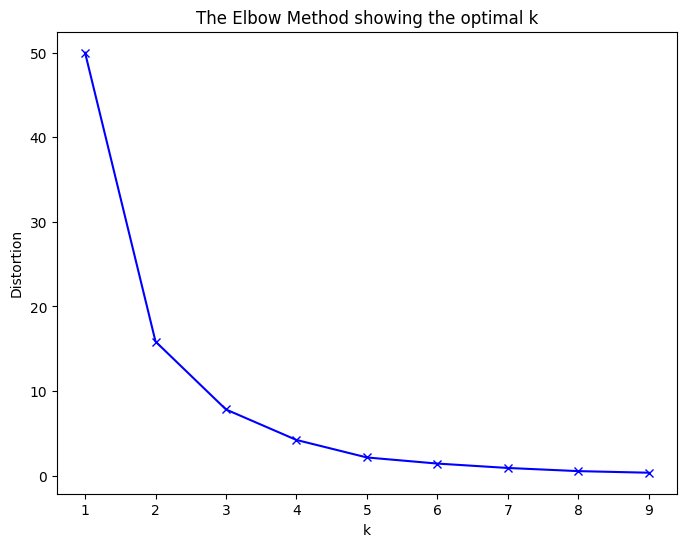

In [ ]:
# Calculate distortions for different numbers of clusters
distortions = []
K = range(1, 10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X)
    distortions.append(kmeanModel.inertia_)

# Plot the elbow
plt.figure(figsize=(8, 6))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()


In [ ]:
# Assume that the optimal number of clusters is 3
kmeanModel = KMeans(n_clusters=5)
kmeanModel.fit(X)

# Assign each 'foreign_apt' to a cluster
top5_apt_per_country['cluster'] = kmeanModel.labels_

top5_apt_per_country.head(50)


c:\Users\Babayeju\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\Babayeju\AppData\Local\Temp\ipykernel_36568\2277836527.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,foreign_country,foreign_apt,ty_total,cluster
145,FRANCE,PARIS (CHARLES DE GAULLE),2970367,0
143,FRANCE,NICE,1312469,3
139,FRANCE,MARSEILLE,561522,4
119,FRANCE,BORDEAUX,541805,4
159,FRANCE,TOULOUSE (BLAGNAC),528811,4
174,GERMANY,FRANKFURT MAIN,2220454,0
165,GERMANY,BERLIN BRANDENBURG,1688853,3
184,GERMANY,MUNICH,1537675,3
171,GERMANY,DUSSELDORF,755356,4
177,GERMANY,HAMBURG,704636,4


In [ ]:
import re
from geopy.geocoders import Nominatim
import time

geolocator = Nominatim(user_agent="geoapiExercises")

def geolocate(airport):
    # Try to get the location (latitude, longitude) of an airport
    try:
        # Extract airport name from the string
        match = re.search(r'\((.*?)\)', airport)
        if match:
            airport_name = match.group(1)
        else:
            airport_name = airport  # If no brackets, use the whole string
        
        # Geolocate the airport
        location = geolocator.geocode(airport_name)
        # Return latitude and longitude
        return (location.latitude, location.longitude)
    except:
        # Return NaN
        return (np.nan, np.nan)

# Create a copy of the DataFrame
top5_apt_per_country_geo = top5_apt_per_country.copy()

# Add a small delay between geocoding requests to avoid service denial
delay = 0.1

# Get the latitude and longitude of each foreign_apt
for idx, row in top5_apt_per_country_geo.iterrows():
    airport = row['foreign_apt']
    lat, lon = geolocate(airport)
    top5_apt_per_country_geo.loc[idx, 'Latitude'] = lat
    top5_apt_per_country_geo.loc[idx, 'Longitude'] = lon
    time.sleep(delay)

# Manually correct the latitude and longitude for AZORES LAJES TERCEIRA ISLAND
top5_apt_per_country_geo.loc[top5_apt_per_country_geo['foreign_apt'] == 'AZORES LAJES TERCEIRA ISLAND', 'Latitude'] = 38.7648
top5_apt_per_country_geo.loc[top5_apt_per_country_geo['foreign_apt'] == 'AZORES LAJES TERCEIRA ISLAND', 'Longitude'] = -27.0908
top5_apt_per_country_geo.loc[top5_apt_per_country_geo['foreign_apt'] == 'ZAKINTHOS', 'Latitude'] = 37.7544
top5_apt_per_country_geo.loc[top5_apt_per_country_geo['foreign_apt'] == 'ZAKINTHOS', 'Longitude'] = 28.8866
top5_apt_per_country_geo.loc[top5_apt_per_country_geo['foreign_apt'] == 'TENERIFE (SURREINA SOFIA)', 'Latitude'] = 28.0468
top5_apt_per_country_geo.loc[top5_apt_per_country_geo['foreign_apt'] == 'TENERIFE (SURREINA SOFIA)', 'Longitude'] = 16.5725
top5_apt_per_country_geo.loc[top5_apt_per_country_geo['foreign_apt'] == 'FRANKFURT MAIN', 'Latitude'] = 50.0380
top5_apt_per_country_geo.loc[top5_apt_per_country_geo['foreign_apt'] == 'FRANKFURT MAIN', 'Longitude'] = 8.5622
top5_apt_per_country_geo.loc[top5_apt_per_country_geo['foreign_apt'] == 'NEW YORK (JF KENNEDY)', 'Latitude'] = 40.6446
top5_apt_per_country_geo.loc[top5_apt_per_country_geo['foreign_apt'] == 'NEW YORK (JF KENNEDY)', 'Longitude'] = -73.780968
top5_apt_per_country_geo.loc[top5_apt_per_country_geo['foreign_apt'] == 'ARRECIFE', 'Latitude'] = 28.9652
top5_apt_per_country_geo.loc[top5_apt_per_country_geo['foreign_apt'] == 'ARRECIFE', 'Longitude'] = -13.5477
top5_apt_per_country_geo.loc[top5_apt_per_country_geo['foreign_apt'] == 'SANTA CRUZ DE LA PALMA	', 'Latitude'] = 28.6840
top5_apt_per_country_geo.loc[top5_apt_per_country_geo['foreign_apt'] == 'SANTA CRUZ DE LA PALMA	', 'Longitude'] = -17.7642


In [ ]:
top5_apt_per_country_geo = top5_apt_per_country_geo.sort_values(by='cluster')
top5_apt_per_country_geo.head(50)

,foreign_country,foreign_apt,ty_total,cluster,Latitude,Longitude
145,FRANCE,PARIS (CHARLES DE GAULLE),2970367,0,43.648777,3.943544
365,PORTUGAL(EXCLUDING MADEIRA),LISBON,2486600,0,38.707751,-9.136592
428,SPAIN,MADRID,2653571,0,40.416705,-3.703582
483,TURKEY,ANTALYA,2485384,0,36.887294,30.707455
485,TURKEY,DALAMAN,2079360,0,36.767214,28.800274
488,TURKEY,ISTANBUL,1885168,0,41.009198,28.966219
443,SPAIN(CANARY ISLANDS),ARRECIFE,2622412,0,28.965200,-13.547700
527,USA,NEW YORK (JF KENNEDY),2977960,0,40.644600,-73.780968
174,GERMANY,FRANKFURT MAIN,2220454,0,50.038000,8.562200
364,PORTUGAL(EXCLUDING MADEIRA),FARO,3748125,1,37.016273,-7.935177


In [ ]:
import folium

# Create a map centered around some location
map = folium.Map(location=[50, 0], zoom_start=2)

# Define colors for clusters (you can add more colors if there are more clusters)
colors = ['red', 'blue', 'green','orange','white']

# Loop over the data and add each data point to the map
for idx, row in top5_apt_per_country_geo.iterrows():
    # Get the location (latitude, longitude)
    location = (row['Latitude'], row['Longitude'])
    # Get the cluster
    cluster = row['cluster']
    # Get the foreign_apt
    apt_name = row['foreign_apt']
    # Choose the color for the marker
    color = colors[cluster]
    # Create a string that includes both the 'foreign_apt' and the 'cluster'
    popup_text = f"{apt_name}, Cluster {cluster}"
    # Add a marker for this location to the map
    folium.Marker(location, popup=popup_text, icon=folium.Icon(color=color)).add_to(map)

# Display the map
map
